In [14]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model, load_model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
os.listdir()

# Triedy obrázkov (zložky s obrázkami)
classes = {"1": "meningioma", "2": "glioma", "3": "pituitary tumor"}

# Základná cesta, kde sa nachádzajú zložky 1, 2, 3
base_path = "."  # alebo absolútna cesta napr. "/path/to/project"

# Zoznamy na uloženie spracovaných dát a labelov
data = []
labels = []

# Pre každú zložku
for zlozka in classes.keys():
    # Cesta k aktuálnej zložke
    cesta_zlozka = os.path.join(base_path, zlozka)

    # Skontroluj, či priečinok existuje
    if not os.path.exists(cesta_zlozka):
        print(f"Priečinok {cesta_zlozka} neexistuje. Skontroluj cestu.")
        continue

    # Pre každý obrázok v zložke
    for obrazok in os.listdir(cesta_zlozka):
        if obrazok.endswith(".png"):
            print(f"Načítavam: {obrazok} z triedy {classes[zlozka]}")
            cesta_aktualny_obrazok = os.path.join(cesta_zlozka, obrazok)
            
            try:
                image = Image.open(cesta_aktualny_obrazok).convert("RGB")
                image = image.resize((128, 128))  # Nová veľkosť 128x128
                image_array = np.array(image) / 255.0  # Normalizácia
                data.append(image_array)
                labels.append(int(zlozka))
            
            except Exception as e:
                print(f"Chyba pri spracovaní obrázku {cesta_aktualny_obrazok}: {e}")

# Prevod na numpy arrays
train_data = np.array(data)
labels = [int(zlozka) - 1 for zlozka in labels]  # Posun na 0, 1, 2
train_labels = to_categorical(np.array(labels), num_classes=3)

# Rozdelenie dát na tréningové a testovacie množiny
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

print("Tvar tréningových obrázkov:", X_train.shape)
print("Tvar testovacích obrázkov:", X_test.shape)
print("Tvar tréningových labelov:", y_train.shape)
print("Tvar testovacích labelov:", y_test.shape)

# **Vytvorenie modelu pomocou transfer learning (VGG16)**
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Zamrznutie pôvodných vrstiev (nechceme ich trénovať)
for layer in vgg16.layers:
    layer.trainable = False

# Pridanie vlastnej klasifikačnej hlavy
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Finalizácia modelu
model = Model(inputs=vgg16.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Výpis štruktúry modelu
model.summary()

# **Tréning modelu**
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

# **Uloženie modelu**
model.save("brain_tumor_classifier.keras")

print("Model bol úspešne natrénovaný a uložený.")






Načítavam: 2300.png z triedy meningioma
Načítavam: 2301.png z triedy meningioma
Načítavam: 2302.png z triedy meningioma
Načítavam: 2303.png z triedy meningioma
Načítavam: 2304.png z triedy meningioma
Načítavam: 2305.png z triedy meningioma
Načítavam: 2306.png z triedy meningioma
Načítavam: 2307.png z triedy meningioma
Načítavam: 2308.png z triedy meningioma
Načítavam: 2309.png z triedy meningioma
Načítavam: 2310.png z triedy meningioma
Načítavam: 2311.png z triedy meningioma
Načítavam: 2312.png z triedy meningioma
Načítavam: 2313.png z triedy meningioma
Načítavam: 2314.png z triedy meningioma
Načítavam: 2315.png z triedy meningioma
Načítavam: 2316.png z triedy meningioma
Načítavam: 2317.png z triedy meningioma
Načítavam: 2318.png z triedy meningioma
Načítavam: 2319.png z triedy meningioma
Načítavam: 2320.png z triedy meningioma
Načítavam: 2321.png z triedy meningioma
Načítavam: 2322.png z triedy meningioma
Načítavam: 2323.png z triedy meningioma
Načítavam: 2324.png z triedy meningioma


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,867 (64.14 MB)

 Trainable params: 2,098,179 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.4659 - loss: 2.1102 - val_accuracy: 0.7500 - val_loss: 0.5050
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.7544 - loss: 0.5029 - val_accuracy: 0.8667 - val_loss: 0.3024
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.8910 - loss: 0.2520 - val_accuracy: 0.8833 - val_loss: 0.2390
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9498 - loss: 0.1295 - val_accuracy: 0.9167 - val_loss: 0.1836
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.9639 - loss: 0.1046 - val_accuracy: 0.9333 - val_loss: 0.1596
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9865 - loss: 0.0817 - val_accuracy: 0.9500 - val_loss: 0.1342
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.9871 - loss: 0.0635 - val_accuracy: 0.9667 - val_loss: 0.1354
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.9953 - loss: 0.0441 - val_accuracy: 0.9500 - val_loss: 0.1161
Epoch 9/

In [9]:
# Vyhodnotenie modelu na testovacích dátach
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Presnosť modelu na testovacích dátach: {test_accuracy * 100:.2f}%")
print(f"Testovacia strata: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9778 - loss: 0.0910
Presnosť modelu na testovacích dátach: 96.67%
Testovacia strata: 0.1106


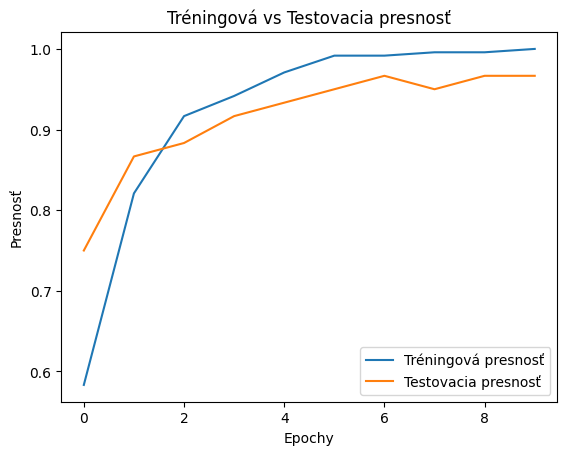

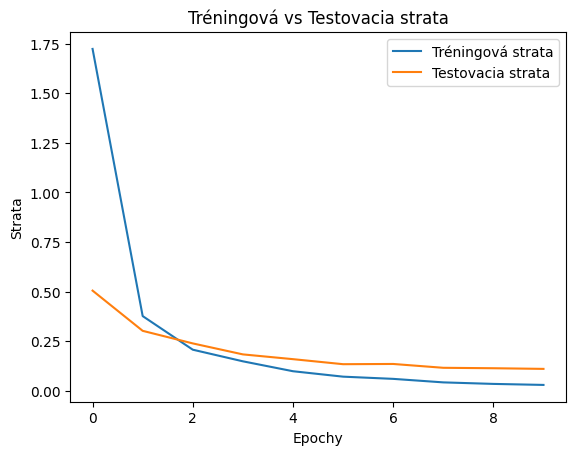

In [10]:
import matplotlib.pyplot as plt

# Graf presnosti
plt.plot(history.history['accuracy'], label='Tréningová presnosť')
plt.plot(history.history['val_accuracy'], label='Testovacia presnosť')
plt.xlabel('Epochy')
plt.ylabel('Presnosť')
plt.legend()
plt.title('Tréningová vs Testovacia presnosť')
plt.show()

# Graf straty
plt.plot(history.history['loss'], label='Tréningová strata')
plt.plot(history.history['val_loss'], label='Testovacia strata')
plt.xlabel('Epochy')
plt.ylabel('Strata')
plt.legend()
plt.title('Tréningová vs Testovacia strata')
plt.show()



In [15]:
# **Načítanie natrénovaného modelu**
model = load_model("brain_tumor_classifier.keras")

# **Funkcia na predikciu nového obrázka**
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((128, 128))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Pridanie dimenzie pre batch

    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)

    class_names = ["meningioma", "glioma", "pituitary tumor"]
    print(f"Predikcia: {class_names[predicted_class]}")

# **Predikcia nového obrázka zo zložky 'Nahoda'**
predict_image("Nahoda/1011.png")  # Nahraď názvom skutočného súboru


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step
Predikcia: pituitary tumor
